In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr


### Homework 5


Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

# Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [8]:
%%writefile code\Bigram.py

from mrjob.job import MRJob    
from mrjob.step import MRStep
import re
WORD_RE = re.compile(r"[\w']+")
class Bigram(MRJob):  
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.reducer_top)
        ]

    def mapper(self, _, line): # mapper function takes line as input and and other input as null value 
        preword=""
        for word in WORD_RE.findall(line):
            if  preword !="" and word !="":           
                yield (preword.lower(),word.lower()), 1
            preword=word
            
    def combiner(self, bigram, counts): # Each time calls the combiner by giving 2 words as bigram and value 1 to the counts 
        yield bigram, sum(counts)
        
    def reducer(self, bigram,count):  # Each time it have 2 words as bigram and produce none value and combination of bigram and count
        yield None,(bigram, sum(count))
        
    def reducer_top(self, _ , bigram_count): # It produces the top 10 highest frequency bigrams
        for i in sorted(bigram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i
            
if __name__ == '__main__':
    Bigram.run()

Overwriting code\Bigram.py


In [9]:
%%capture Bigram 
# It captures the output from the reducer_top and store in the Bigram
%run code/Bigram.py data/bible+shakes.nopunc.txt

In [4]:
with open('data/MRBigramFreqCount.txt', 'w') as f:
    f.write(Bigram.stdout)

In [7]:
Bigram_data = pd.read_csv("data/MRBigramFreqCount.txt", sep="\t", header=None)
#It reads the data in the text file from above step
Bigram_data

,0,1
0,"[""''all"", ""my""]",1
1,"[""''among"", ""the""]",1
2,"[""''and"", ""lo""]",1
3,"[""''but"", ""o""]",1
4,"[""''how"", ""mighty""]",1
5,"[""''lo"", ""all""]",1
6,"[""''lo"", ""this""]",1
7,"[""''look"", ""here""]",1
8,"[""''my"", ""parts""]",1
9,"[""''now"", ""all""]",1


# Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [7]:
%%writefile code\Bigram_second.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
WORD_RE = re.compile(r"[\w']+")
class Bigram_second(MRJob):  
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.reducer_top)
        ]

    def mapper(self, _, line):  # mapper function takes line as input and and other input as null value 
        preword=""
        for word in WORD_RE.findall(line):
            if  preword !="" and word !="":
                value = (preword.lower(), word.lower())
                yield value, 1
            preword=word
            
    def combiner(self, bigram, counts):  # Each time it have 2 words as bigram and produce none value and combination of bigram and count
        yield sorted(bigram), sum(counts) #sorted the biagram
        
    def reducer(self, bigram,count):
        yield None,(bigram, sum(count))
        
    def reducer_top(self, _ , bigram_count): # It produces the top 10 highest frequency bigrams
        for i in sorted(bigram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i
            
if __name__ == '__main__':
     Bigram_second.run()

Overwriting code\Bigram_second.py


In [8]:
%run code/Bigram_second.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sandeep\appdata\local\temp\Bigram_second.Sandeep.20181008.184611.576000
Running step 2 of 2...
job output is in c:\users\sandeep\appdata\local\temp\Bigram_second.Sandeep.20181008.184611.576000\output
Streaming final output from c:\users\sandeep\appdata\local\temp\Bigram_second.Sandeep.20181008.184611.576000\output...


["of", "the"]	13037
["lord", "the"]	7244
["and", "the"]	7034
["in", "the"]	6739
["i", "will"]	4100
["the", "to"]	3799
["and", "he"]	3129
["have", "i"]	3123
["be", "shall"]	3015
["am", "i"]	2881


Removing temp directory c:\users\sandeep\appdata\local\temp\Bigram_second.Sandeep.20181008.184611.576000...
[Error 5] Access is denied: u'c:\\users\\sandeep\\appdata\\local\\temp\\Bigram_second.Sandeep.20181008.184611.576000\\step\\000\\cache\\Bigram_second.py'
Traceback (most recent call last):
  File "C:\Users\Sandeep\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname

# Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [19]:
%%writefile code\Trigram.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
WORD_RE = re.compile(r"[\w']+")
class Trigram(MRJob):  
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.reducer_top)
        ]

    def mapper(self, _, line):  # mapper function takes line as input and and other input as null value 
        words = WORD_RE.findall(line)
        for i, word in enumerate(words):
            if i < len(words) - 2:
                trigram = [words[i].lower(), words[i + 1].lower(), words[i + 2].lower()]
                yield trigram, 1
            
    def combiner(self, trigram, counts): # Each time it have 2 words as tirgram and produce none value and combination of trigram and count
        yield trigram, sum(counts)
        
    def reducer(self, trigram,count):
        yield None,(trigram, sum(count))
        
    def reducer_top(self, _ , trigram_count): # It produces the top 10 highest frequency trigrams
        for i in sorted(trigram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i
            
if __name__ == '__main__':
    Trigram.run()

Overwriting code\Trigram.py


In [20]:
%%capture Trigram
# It captures the output from the reducer_top and store in the Trigram
%run code/Trigram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sandeep\appdata\local\temp\Trigram.Sandeep.20181008.190229.810000
Running step 2 of 2...
job output is in c:\users\sandeep\appdata\local\temp\Trigram.Sandeep.20181008.190229.810000\output
Streaming final output from c:\users\sandeep\appdata\local\temp\Trigram.Sandeep.20181008.190229.810000\output...
Removing temp directory c:\users\sandeep\appdata\local\temp\Trigram.Sandeep.20181008.190229.810000...
[Error 5] Access is denied: u'c:\\users\\sandeep\\appdata\\local\\temp\\Trigram.Sandeep.20181008.190229.810000\\step\\000\\cache\\Trigram.py'
Traceback (most recent call last):
  File "C:\Users\Sandeep\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Use

In [21]:
with open('data/MRTrigramFreqCount.txt', 'w') as f:
    f.write(Trigram.stdout)

In [37]:
Trigram_data = pd.read_csv("data/MRTrigramFreqCount.txt", sep="\t", header=None)
#It reads the data in the text file from above step
Trigram_data

,0,1
0,"[""of"", ""the"", ""lord""]",1746
1,"[""the"", ""son"", ""of""]",1470
2,"[""the"", ""children"", ""of""]",1356
3,"[""the"", ""house"", ""of""]",920
4,"[""out"", ""of"", ""the""]",855
5,"[""saith"", ""the"", ""lord""]",854
6,"[""and"", ""i"", ""will""]",798
7,"[""children"", ""of"", ""israel""]",644
8,"[""and"", ""all"", ""the""]",643
9,"[""the"", ""land"", ""of""]",617


# Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

Creating Mongram which has frequency for each word

In [23]:
%%writefile code\Monogram.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
WORD_RE = re.compile(r"[\w']+")
class Monogram(MRJob):  
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.reducer_top)
        ]

    def mapper(self, _, line):
          for word in WORD_RE.findall(line):
            yield word, 1
                        
    def combiner(self, monogram, counts):
        yield monogram, sum(counts)
        
    def reducer(self, monogram,count):
        yield None,(monogram, sum(count))
        
    def reducer_top(self, _ , monogram_count):
        for i in sorted(monogram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i
            
if __name__ == '__main__':
     Monogram.run()

Overwriting code\Monogram.py


In [27]:
%%capture Monogram
%run code/Monogram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.193605.340000
Running step 2 of 2...
job output is in c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.193605.340000\output
Streaming final output from c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.193605.340000\output...
Removing temp directory c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.193605.340000...
[Error 5] Access is denied: u'c:\\users\\sandeep\\appdata\\local\\temp\\Monogram.Sandeep.20181008.193605.340000\\step\\000\\cache\\Monogram.py'
Traceback (most recent call last):
  File "C:\Users\Sandeep\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "

In [28]:
with open('data/MRMonogramFreqCount.txt', 'w') as f:
    f.write(Monogram.stdout)

In [29]:
Monogram_data = pd.read_csv("data/MRMonogramFreqCount.txt", sep="\t", header=None)
#It reads the data in the text file from above step
Monogram_data

,0,1
0,the,93739
1,and,79182
2,of,53121
3,to,33929
4,i,30240
5,that,24407
6,in,24350
7,a,23504
8,my,17312
9,he,17087


Plotting graph for Monogram_data , Bigram_data and Trigram_data which are captured during above questions

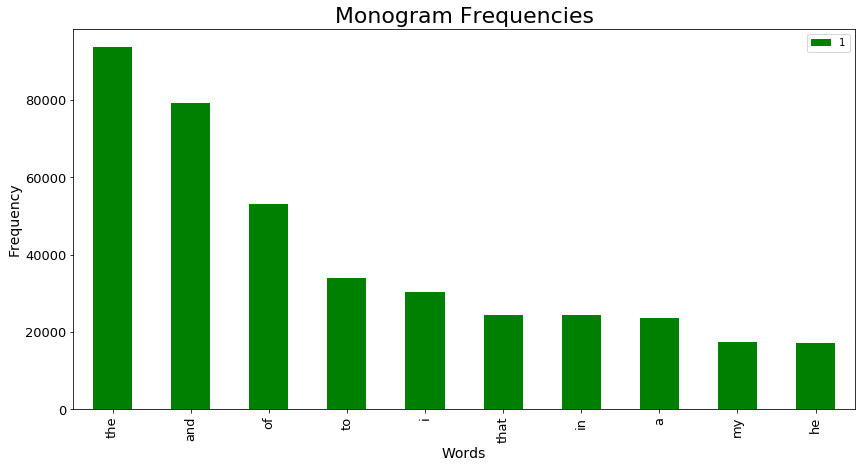

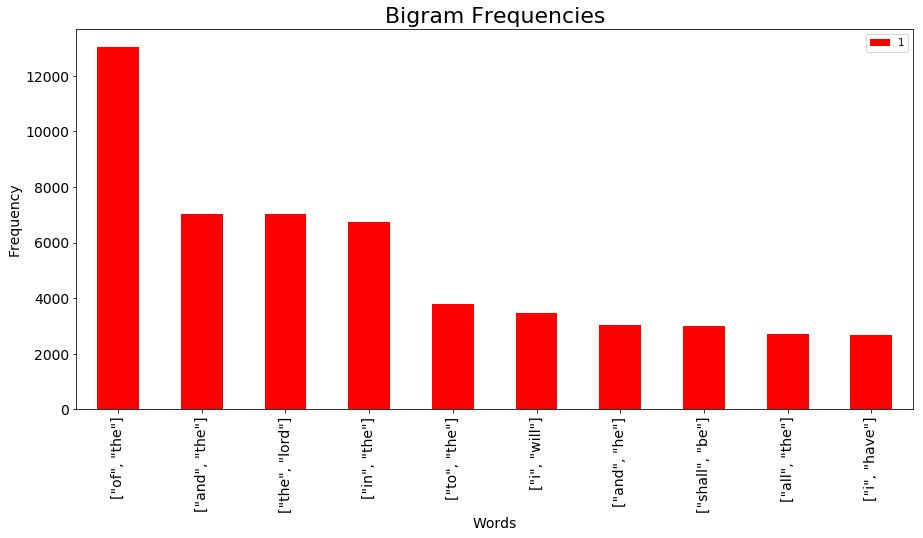

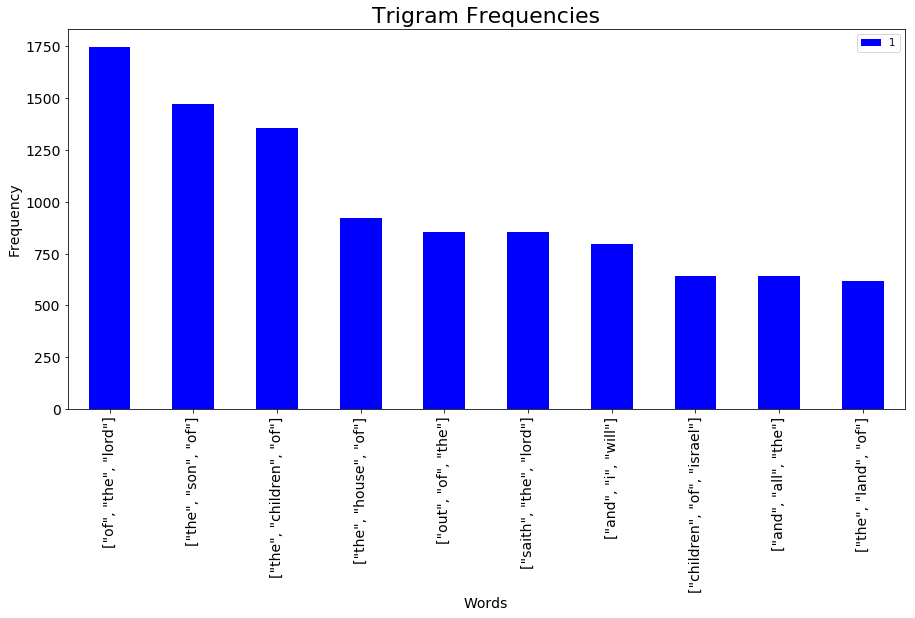

In [32]:
import matplotlib.pyplot as plt
plot1 = Monogram_data.plot(x=0, y=1, kind="bar", figsize=(14, 7), fontsize=13,color="green") 
plot1.set_title('Monogram Frequencies', fontsize=22)
plot1.set_ylabel("Frequency", fontsize=14)
plot1.set_xlabel("Words", fontsize=14)
plt.show()
plot2 = Bigram_data.plot(x=0, y=1, kind="bar", figsize=(15, 7), fontsize=14,color="red") 
plot2.set_title('Bigram Frequencies', fontsize=22)
plot2.set_ylabel("Frequency", fontsize=14)
plot2.set_xlabel("Words", fontsize=14)
plt.show()
plot3 = Trigram_data.plot(x=0, y=1, kind="bar", figsize=(15, 7), fontsize=14,color="blue")
plot3.set_title('Trigram Frequencies', fontsize=22)
plot3.set_ylabel("Frequency", fontsize=14)
plot3.set_xlabel("Words", fontsize=14)
plt.show()

### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [33]:
import urllib
url1 = 'http://www.gutenberg.org/ebooks/1661.txt.utf-8'
url2 = 'http://www.gutenberg.org/files/244/244-0.txt'
url3 = 'http://www.gutenberg.org/files/2852/2852-0.txt'
url4 = 'http://www.gutenberg.org/files/108/108-0.txt'
url5 = 'http://www.gutenberg.org/ebooks/2097.txt.utf-8'
#writing all the data from url to txt file and saving in the data location
matter1 = urllib.urlopen(url1).read() 
f1 = open('data/The_Adventures_of_Sherlock_Holmes.txt', 'w')
f1.write(matter1)
f1.close()

matter2 = urllib.urlopen(url2).read()
f2 = open('data/A_Study_in_Scarlet.txt', 'w')
f2.write(matter2)
f2.close()

matter3 = urllib.urlopen(url3).read()
f3 = open('data/The_Hound_of_the_Baskervilles.txt', 'w')
f3.write(matter3)
f3.close()

matter4 = urllib.urlopen(url4).read()
f4 = open('data/The_Return_of_Sherlock_Holmes.txt', 'w')
f4.write(matter4)
f4.close()

matter5 = urllib.urlopen(url1).read()
f5 = open('data/The_Sign_of_the_Four.txt', 'w')
f5.write(matter5)
f5.close()


In [34]:
%%capture HighestFreqency
#Applying Monogram code to all text files 
%run code/Monogram.py data/The_Adventures_of_Sherlock_Holmes.txt
%run code/Monogram.py data/A_Study_in_Scarlet.txt
%run code/Monogram.py data/The_Hound_of_the_Baskervilles.txt
%run code/Monogram.py data/The_Return_of_Sherlock_Holmes.txt
%run code/Monogram.py data/The_Sign_of_the_Four.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.214138.285000
Running step 2 of 2...
job output is in c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.214138.285000\output
Streaming final output from c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.214138.285000\output...
Removing temp directory c:\users\sandeep\appdata\local\temp\Monogram.Sandeep.20181008.214138.285000...
[Error 5] Access is denied: u'c:\\users\\sandeep\\appdata\\local\\temp\\Monogram.Sandeep.20181008.214138.285000\\step\\000\\cache\\Monogram.py'
Traceback (most recent call last):
  File "C:\Users\Sandeep\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sandeep\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "

In [35]:
with open('Combined_Freq.txt', 'w') as f: ## open the text file
    f.write(HighestFreqency.stdout) 

In [36]:
File = pd.read_csv("Combined_Freq.txt", sep="\t", header=None)
sort_val = File.sort_values(1, ascending=False) ##sort the values from highest to lowest
print "The Adventures of Sherlock Holmes"
Combined_data = sort_val[[0,1]].head(20)##display the top 20 words and relation between the four texts
Combined_data

The Adventures of Sherlock Holmes


,0,1
30,the,5885
0,the,5423
40,the,5423
20,the,3245
31,I,3007
41,I,2961
1,I,2961
32,and,2883
42,and,2879
2,and,2879
